

<b>Neural Networks With Tensor Flow and Keras</b>

In [0]:

pip install tensorflow-gpu==2.0.0-rc1

In [0]:
from tensorflow.keras.models import Sequential 

In [0]:

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [0]:
X_train[0].shape

(784,)

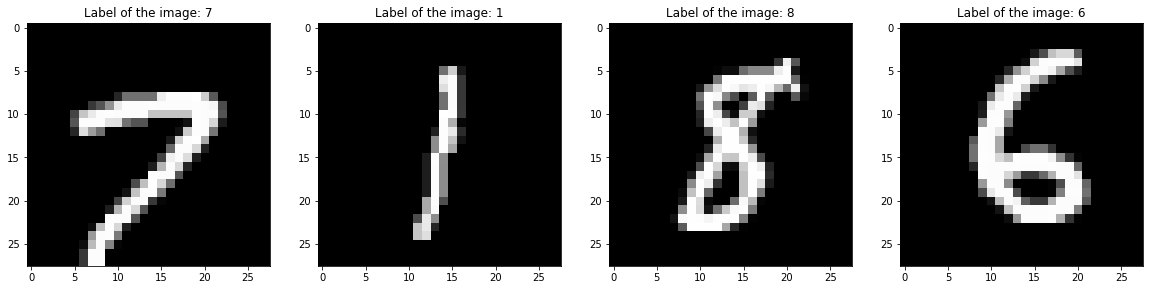

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 274us/sample - loss: 1.0691 - accuracy: 0.7703
Epoch 2/20
60000/60000 [==============================] - 16s 265us/sample - loss: 0.4363 - accuracy: 0.8875
Epoch 3/20
60000/60000 [==============================] - 16s 266us/sample - loss: 0.3493 - accuracy: 0.9040
Epoch 4/20
60000/60000 [==============================] - 16s 267us/sample - loss: 0.3099 - accuracy: 0.9132
Epoch 5/20
60000/60000 [==============================] - 16s 269us/sample - loss: 0.2845 - accuracy: 0.9202
Epoch 6/20
60000/60000 [==============================] - 16s 269us/sample - loss: 0.2653 - accuracy: 0.9265
Epoch 7/20
60000/60000 [==============================] - 16s 268us/sample - loss: 0.2496 - accuracy: 0.9306
Epoch 8/20
60000/60000 [==============================] - 16s 270us/sample - loss: 0.2363 - accuracy: 0.9343
Epoch 9/20
60000/60000 [==============================] - 16s 271us/sample - loss: 0.2245 - accuracy: 0.9

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.14768791799098252
Test accuracy: 0.9574


1. In this task, you'll build an ANN and train and test it using the MNIST data. This ANN should consist of two hidden and one output layer. All hidden layers should be dense. The neuron sizes of the first layer and the second layer should be 32 and 16 respectively. Train this model 20 epochs and compare your train and test set performance with the example in the checkpoint. Is there any difference? If so, why?

In [0]:
model = Sequential()
# our first dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(16, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/sample - loss: 1.7261 - accuracy: 0.4565
Epoch 2/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8714 - accuracy: 0.7723
Epoch 3/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.5779 - accuracy: 0.8395
Epoch 4/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.4519 - accuracy: 0.8725
Epoch 5/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3885 - accuracy: 0.8892
Epoch 6/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3543 - accuracy: 0.8985
Epoch 7/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3314 - accuracy: 0.9049
Epoch 8/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3145 - accuracy: 0.9103
Epoch 9/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3005 - accuracy: 0.9143
Epoch 10/20
60

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.215269132091105
Test accuracy: 0.9384


we see a 94%accuracy

2. You'll also build an ANN in this task. This time, this ANN should have 5 hidden layers and 1 output layer. All the layers should be dense. The neuron numbers for the hidden layers should be 1024, 512, 256, 128 and 64. Train this model 20 epochs and test it using the same data from the previous task and compare your results. Is there any difference? If so, why?

In [0]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 223us/sample - loss: 1.2288 - accuracy: 0.6605
Epoch 2/20
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3716 - accuracy: 0.8957
Epoch 3/20
60000/60000 [==============================] - 13s 219us/sample - loss: 0.2870 - accuracy: 0.9176
Epoch 4/20
60000/60000 [==============================] - 13s 223us/sample - loss: 0.2422 - accuracy: 0.9297
Epoch 5/20
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2113 - accuracy: 0.9387
Epoch 6/20
60000/60000 [==============================] - 13s 218us/sample - loss: 0.1870 - accuracy: 0.9466
Epoch 7/20
60000/60000 [==============================] - 13s 218us/sample - loss: 0.1676 - accuracy: 0.9518
Epoch 8/20
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1511 - accuracy: 0.9567
Epoch 9/20
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1378 - accuracy: 0.9

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.09425604606047272
Test accuracy: 0.9709


97%accuracy in the test set